### Participant 1

In [265]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

RESPONSES = ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly Agree']

%matplotlib inline
sns.set_style('whitegrid')

In [266]:
def get_text_file_responses(data_file):
    with open(data_file) as f:
        data = json.load(f)

    return data['responses']

Clean code of duplicates

In [267]:
def create_table(responses):
    df = pd.DataFrame()
    for key, value in responses.items():
        new_df = pd.json_normalize(value)
        new_df['image'] = key
        df = pd.concat([df, new_df])
    
    df['folder'] = df['image'].str.split('/').apply(lambda x: x[0])

    return df.replace(['noe'], ['nor'])\
             .replace(['std', 'dis', 'nor', 'agree', 'Strong_agree'],
                      ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly Agree']
            
                     )

In [269]:
def cleanup_df(df):
    df.loc[df['id'] == 17, 'name'] = 'likert_4'
    # fix missing values
    df.fillna('Strongly Disagree', inplace=True)
    mapping = {'Strongly Disagree': 45, 45: 'likert_9'}
    df = df.replace({'id': mapping, 'name': mapping})\
           .replace(['noe'], ['nor'])\
           .replace(['std', 'dis', 'nor', 'agree', 'Strong_agree'],
                    ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly Agree'])
    return df.drop_duplicates(['name', 'image'], keep='last')

## Visuals: Relationship between Visualization Type and Response Value

In [271]:
df.loc[df['response'] == 'Strongly Disagree'].shape[0] / df.shape[0]

0.1094224924012158

In [272]:
df.shape[0]

329

In [273]:
df.head()

,name,id,response,image,folder
0,likert_2,10,Strongly Disagree,news/wsj466.png,news
1,likert_3,12,Agree,news/wsj466.png,news
2,likert_4,19,Disagree,news/wsj466.png,news
3,likert_5,24,Disagree,news/wsj466.png,news
4,likert_7,31,Strongly Agree,news/wsj466.png,news


In [274]:
def plot_response(df, folder_name):

    sns.catplot(data=df.loc[df['folder'] == folder_name],
            x='response',
            kind="count",
            height=5,
            aspect=2,
            order=RESPONSES)

    plt.title(f"Responses for {folder_name.capitalize()} Visuals")
    
    count = 0
    for response in RESPONSES:
        height = df.loc[(df['response'] == response) &\
                       (df['folder'] == folder_name)
                      ].shape[0]
        total_rows = df.loc[df['folder'] == folder_name].shape[0]
        plt.annotate(f"{int((height/total_rows)*100)}%", (count, height+1))
        count += 1

In [275]:
gb = df.groupby(['folder', 'name', 'response']).count().reset_index()

In [276]:
gb.loc[(gb['name'] == 'likert_3') & (gb['folder'] == 'government')]

,folder,name,response,id,image
9,government,likert_3,Agree,2,2
10,government,likert_3,Disagree,2,2
11,government,likert_3,Strongly Agree,1,1


In [277]:
gb = concatenated.groupby(['folder', 'name', 'response']).count().reset_index()

In [278]:
gb

,folder,name,response,id,image
0,government,likert_1,Agree,23,23
1,government,likert_1,Disagree,2,2
2,government,likert_1,Neither,12,12
3,government,likert_1,Strongly Agree,12,12
4,government,likert_1,Strongly Disagree,1,1
...,...,...,...,...,...
319,vis3,likert_9,Agree,32,32
320,vis3,likert_9,Disagree,3,3
321,vis3,likert_9,Neither,2,2
322,vis3,likert_9,Strongly Agree,7,7


In [279]:
def bar_values(gb):
    output = []
    for response in RESPONSES:
        height = gb.loc[gb['response'] == response, 'id']
        if height.shape[0] == 0:
            output.append(0)
        else:
            output.append(height.values[0])
    
    return output 

In [280]:
bar_values(gb.loc[(gb['folder'] == 'vis3') & (gb['name'] == 'likert_9')])

[6, 3, 2, 32, 7]

In [281]:
def create_subplots(df, row_name, col_name, x_axis):
    count = 1
    for col in df[col_name].unique():
        for row in df[row_name].unique():
            plot_df = df.loc[(df[col_name] == col) & (df[row_name] == row)]
            gb = plot_df.groupby([col_name, row_name, x_axis]).count().reset_index()
            
            ax = plt.subplot(len(df['name'].unique()), len(df['folder'].unique()), count)
            plt.bar(x=RESPONSES, height=bar_values(gb), color=['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6'])
            plt.ylabel("Count")
            plt.xticks(rotation=90)
            ax.title.set_text(f"{col.capitalize()} | {row.capitalize()}")
            count += 1

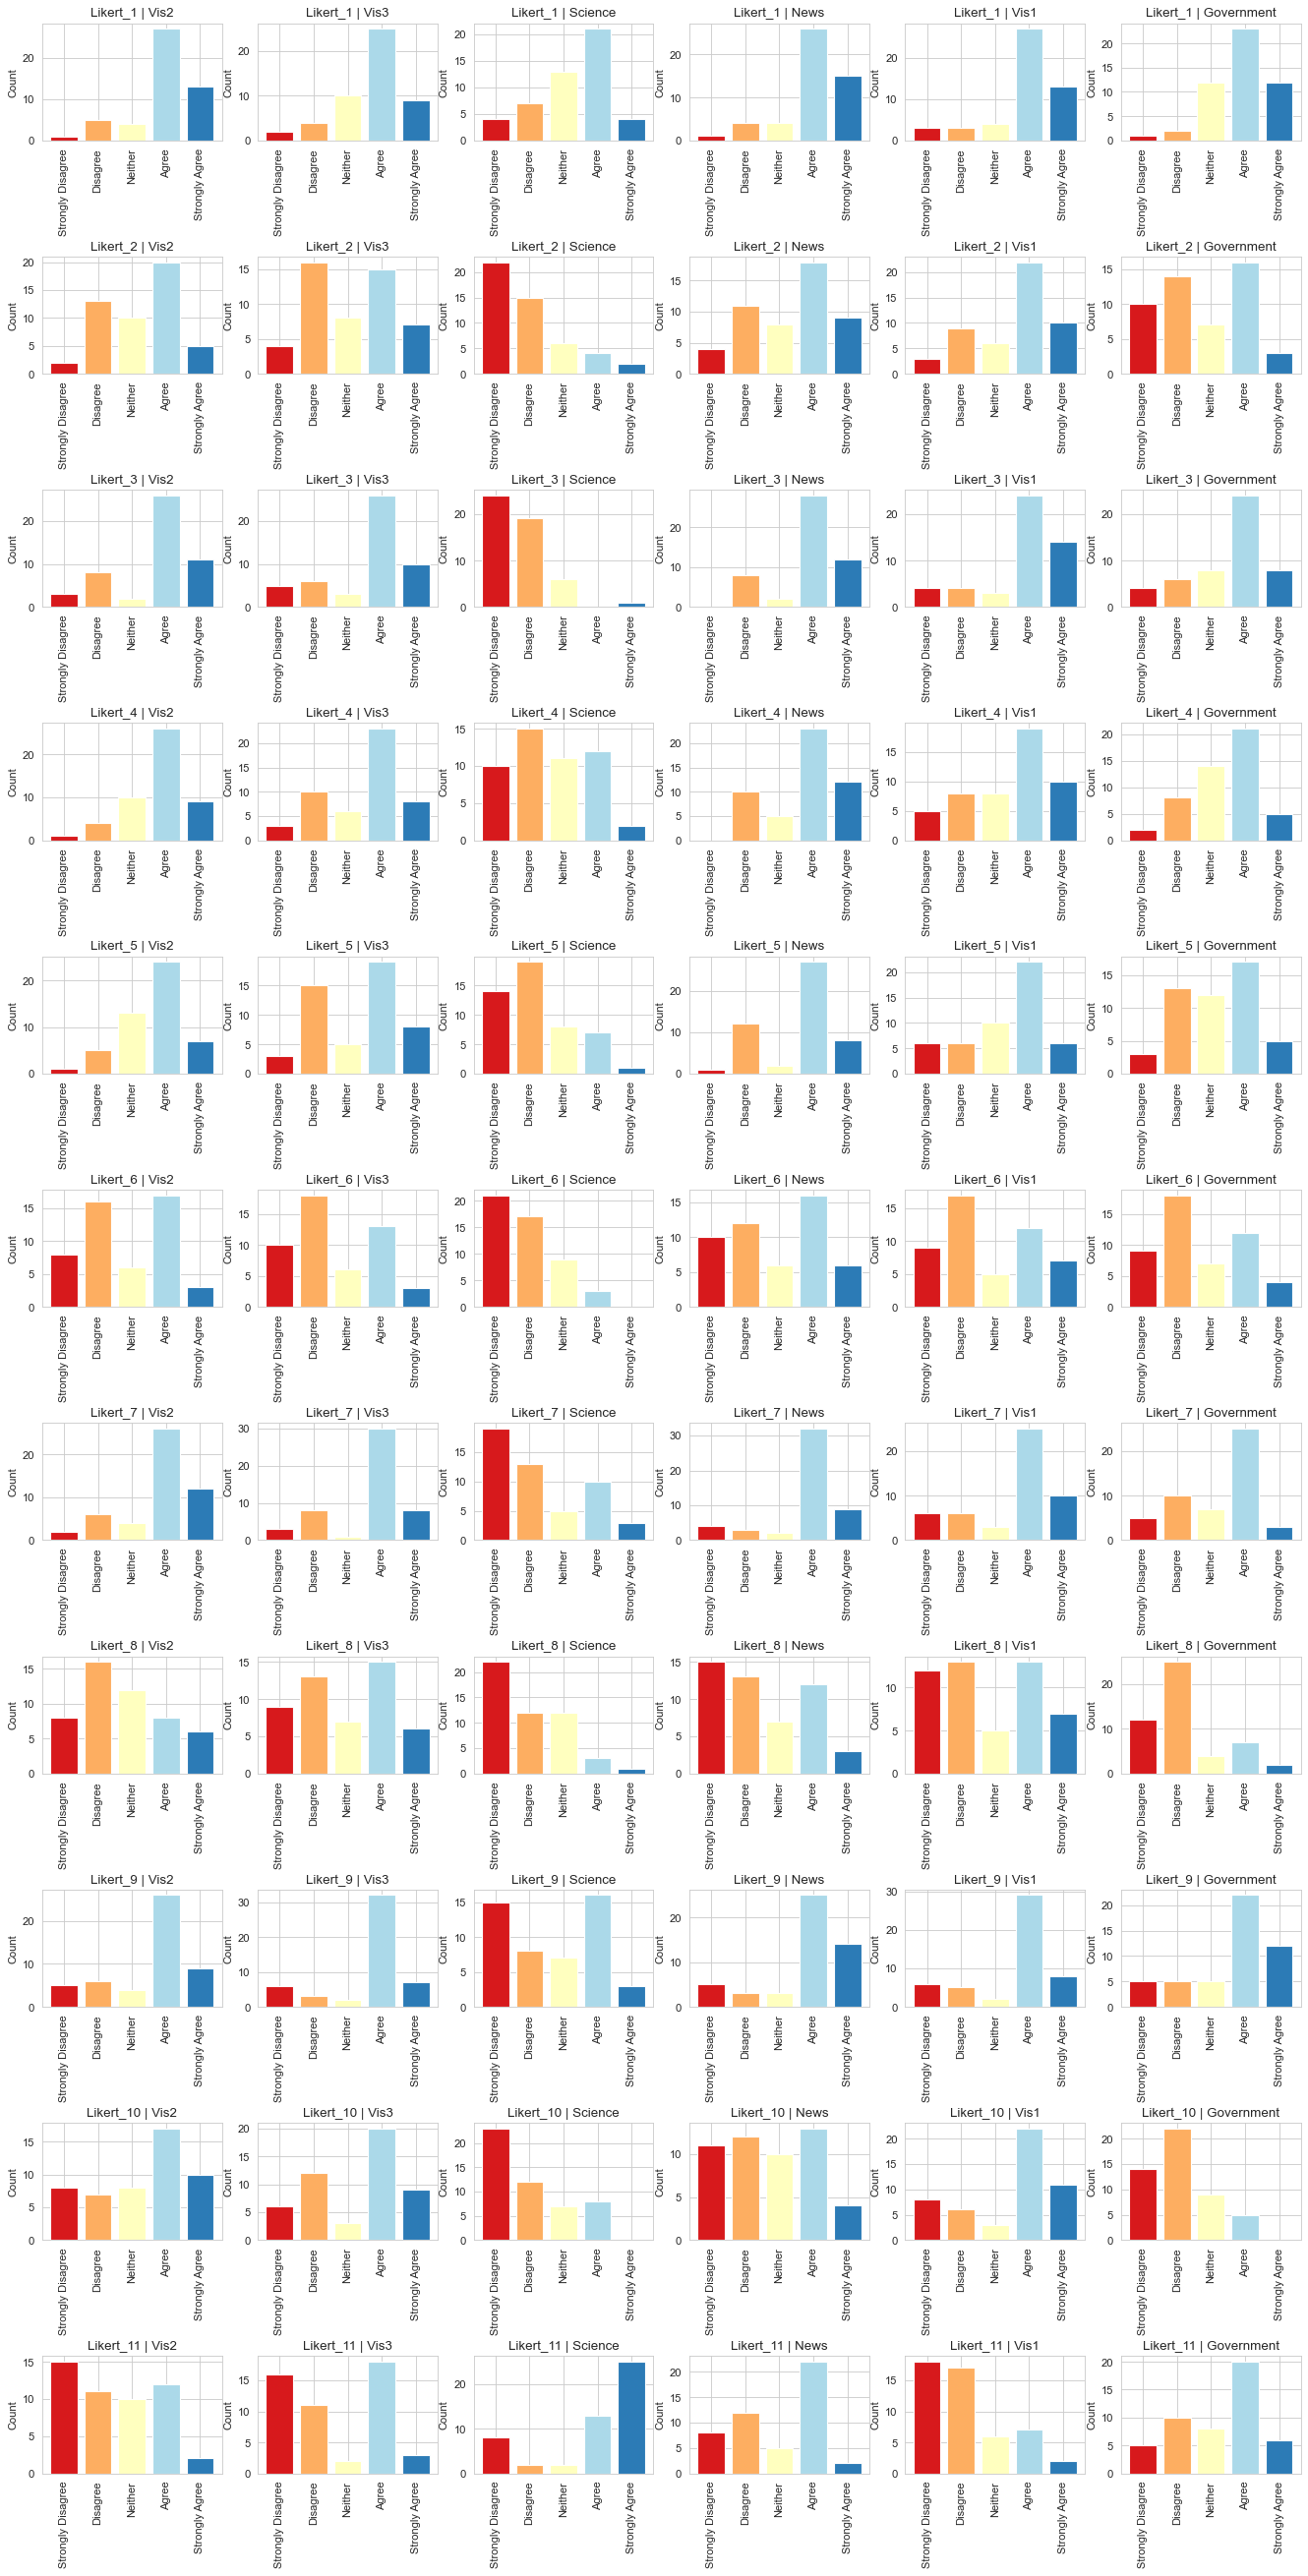

In [305]:
plt.figure(figsize=(20, 35), dpi=80)
plt.subplots_adjust(left=0.1,
                    bottom=0.01,
                    right=0.9,
                    top=0.9,
                    hspace=0.99)
create_subplots(concatenated, 'folder', 'name', 'response')
plt.savefig('allCategories_allquestions_individualBarplot.png', dpi=200, bbox_inches = 'tight')

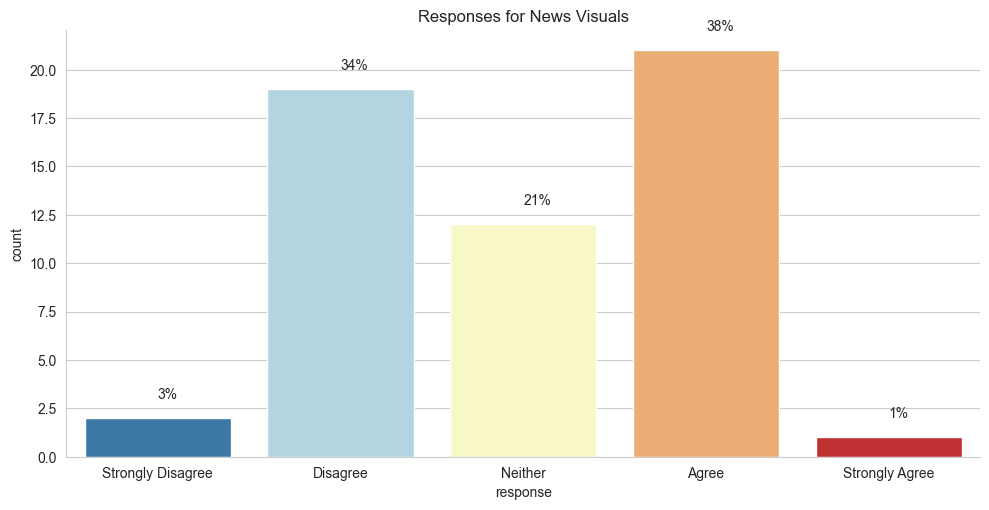

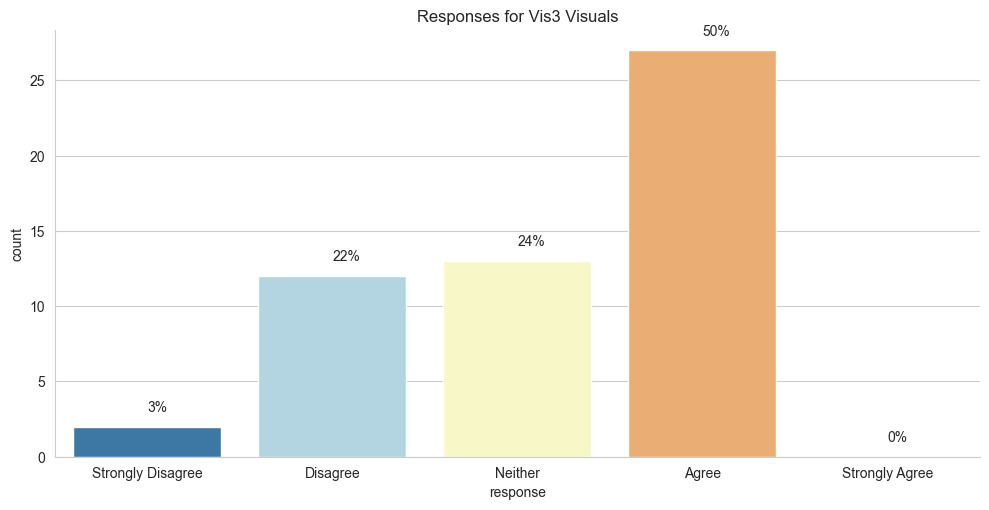

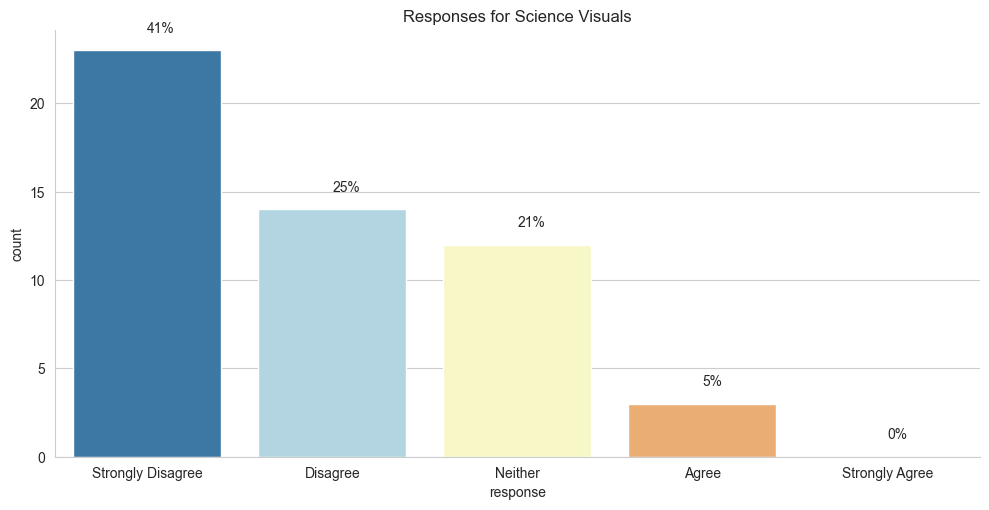

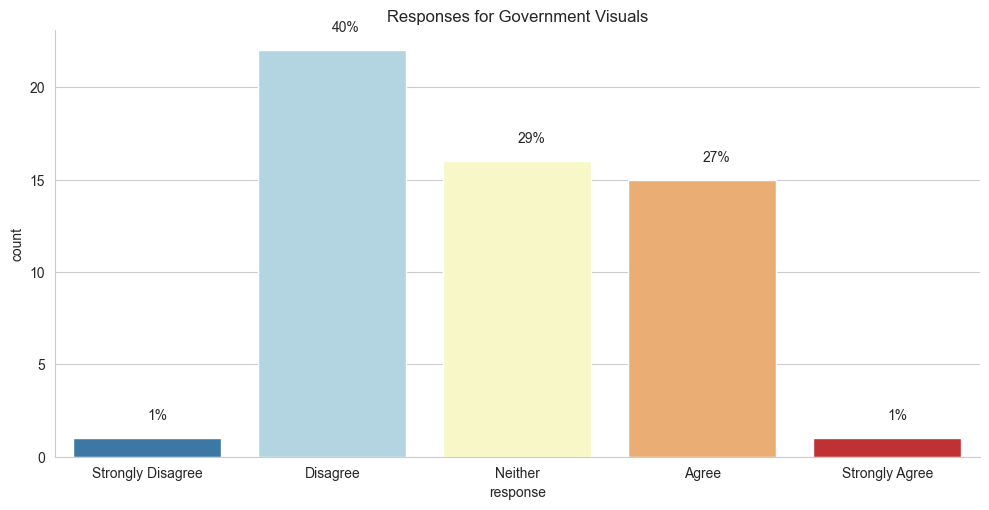

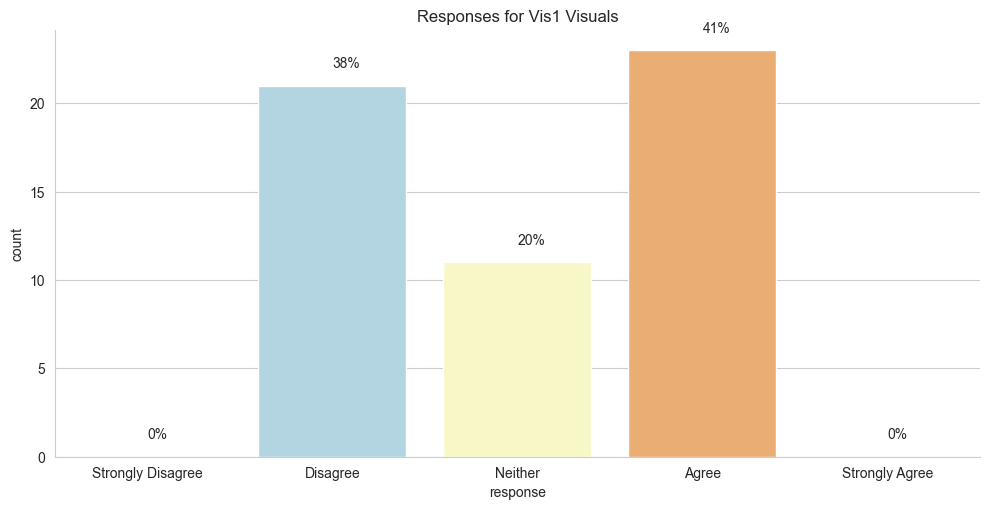

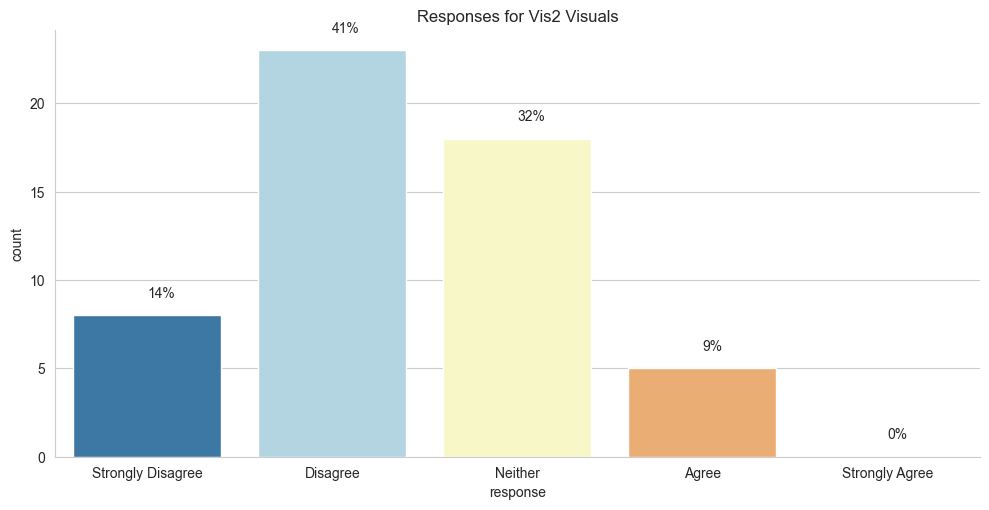

In [283]:
plot_response(df, 'news')
plot_response(df, 'vis3')
plot_response(df, 'science')
plot_response(df, 'government')
plot_response(df, 'vis1')
plot_response(df, 'vis2')

## All Participants

In [284]:
#1
df1 = get_text_file_responses('UuBoG0_KiytpUZXX9V7Enw.txt')
df1 = create_table(df1)
df1 = cleanup_df(df1) 


#2
df2 = get_text_file_responses('mXQxt45qf3HmNZ8V6Y-gQg.txt')
df2 = create_table(df2)
df2 = cleanup_df(df2) 


#3
df3 = get_text_file_responses('C8sniClhFKJUWpkdJtBdMQ.txt')
df3 = create_table(df3)
df3 = cleanup_df(df3)   

#4
df4 = get_text_file_responses('46mIUSaIlYn0ooLrRi8bWw.txt')
df4 = create_table(df4)
df4 = cleanup_df(df4)   


#5
df5 = get_text_file_responses('CAst6IJu1mbQh4VGPrs7Mw.txt')
df5 = create_table(df5)
df5 = cleanup_df(df5)  
  

#6
df6 = get_text_file_responses('dYhVzMT6hTBJ8SCSDLgvBQ.txt')
df6 = create_table(df6)
df6 = cleanup_df(df6)   


#7
df7 = get_text_file_responses('FpVPTjgHaUWA_eIrRNWjdw.txt')
df7 = create_table(df7)
df7 = cleanup_df(df7)   


#8
df8 = get_text_file_responses('Sv_ZdnSoWDwmYWACFgeTcA.txt')
df8 = create_table(df8)
df8 = cleanup_df(df8)   

#9
df9 = get_text_file_responses('yVsZ2V9CJoo2z3VgB3jF0w.txt')
df9 = create_table(df9)
df9 = cleanup_df(df9)  

#10
df10 = get_text_file_responses('pPbJRJFp2YcuE504Awc29A.txt')
df10 = create_table(df10)
df10 = cleanup_df(df10)  


#ALL
concatenated = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [162]:
concatenated['id'].unique()

array([ 1,  8, 11, 16, 22, 26, 31, 39, 41, 46, 52, 42, 47, 36, 32, 29, 23,
       17,  7,  2, 24, 18, 15, 28, 38, 25, 48, 51, 10, 40, 21,  6, 27, 50,
        4, 19, 20, 55,  3,  9, 12, 54, 14, 37, 13, 33, 34, 44, 49, 35, 53,
       30, 43,  5, 45])

In [163]:
concatenated

,name,id,response,image,folder
0,likert_1,1,Strongly Agree,vis2/vis334.png,vis2
1,likert_2,8,Neither,vis2/vis334.png,vis2
2,likert_3,11,Strongly Agree,vis2/vis334.png,vis2
3,likert_4,16,Strongly Agree,vis2/vis334.png,vis2
4,likert_5,22,Agree,vis2/vis334.png,vis2
...,...,...,...,...,...
9,likert_7,32,Agree,government/whoJ45_1.png,government
10,likert_8,40,Strongly Disagree,government/whoJ45_1.png,government
11,likert_9,45,Strongly Disagree,government/whoJ45_1.png,government
12,likert_10,50,Strongly Disagree,government/whoJ45_1.png,government


In [48]:
#concatenated.fillna('Strongly Disagree', inplace=True)
#mapping = {'Strongly Disagree': 45, 45: 'likert_9'}
#concatenated = concatenated.replace({'id': mapping, 'name': mapping})

In [164]:
concatenated['response'].unique()

array(['Strongly Agree', 'Neither', 'Agree', 'Disagree',
       'Strongly Disagree'], dtype=object)

In [165]:
#concatenated = concatenated.drop_duplicates(['name', 'image'], keep='last')

### All Categories and Liketr Response for All Participants

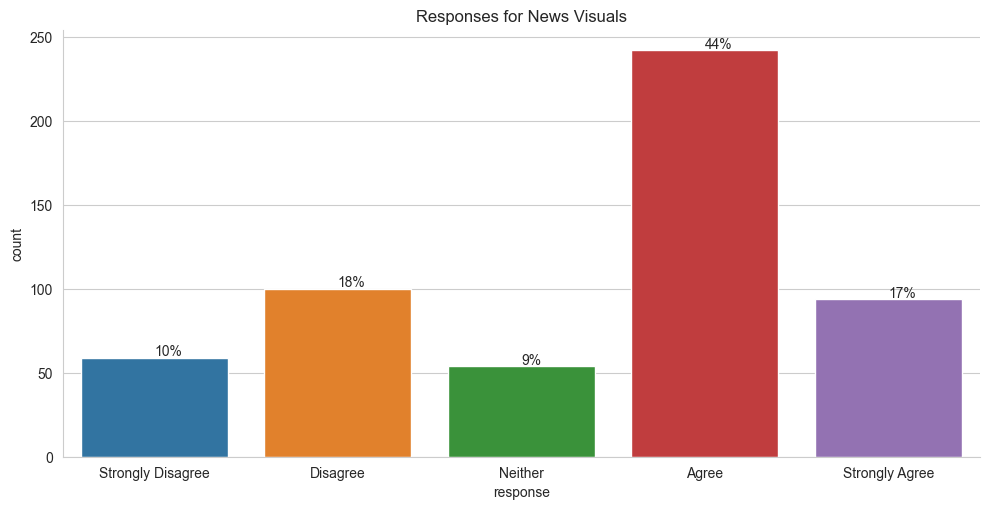

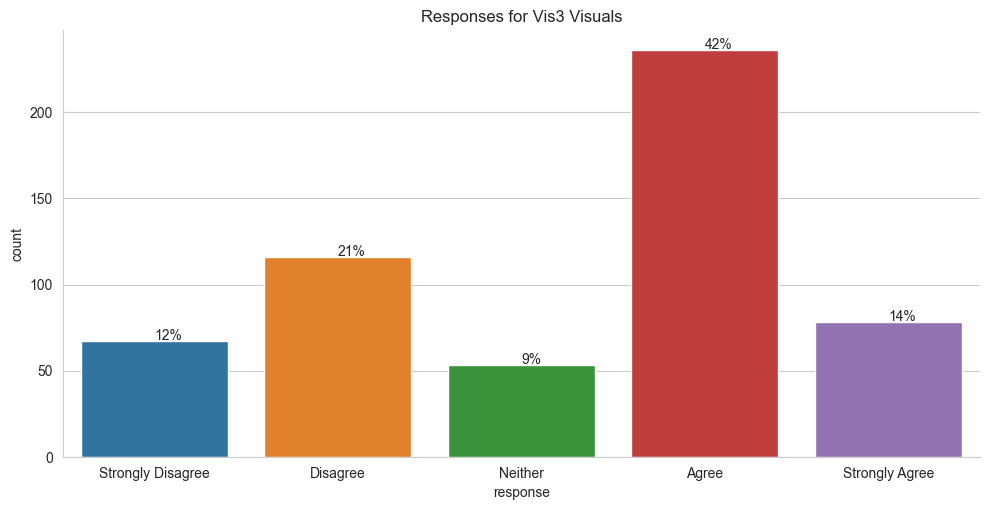

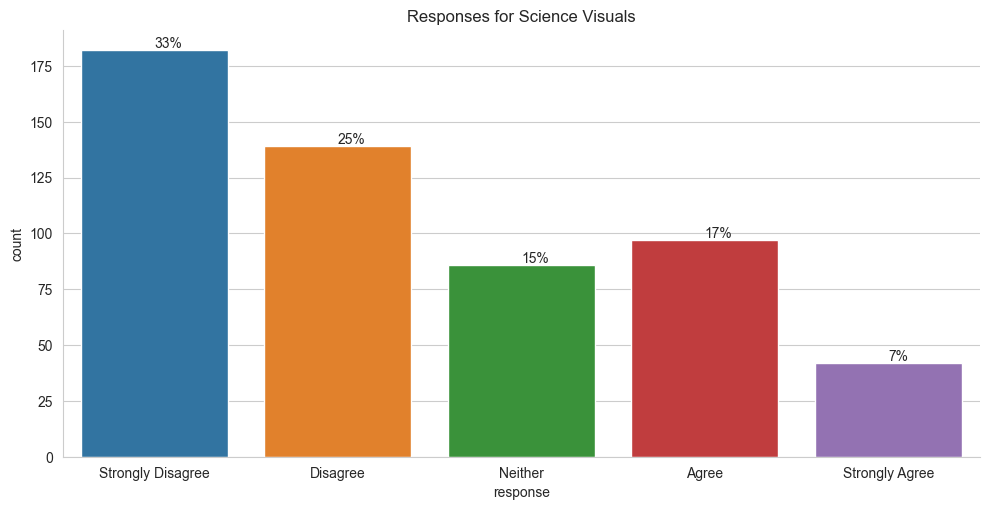

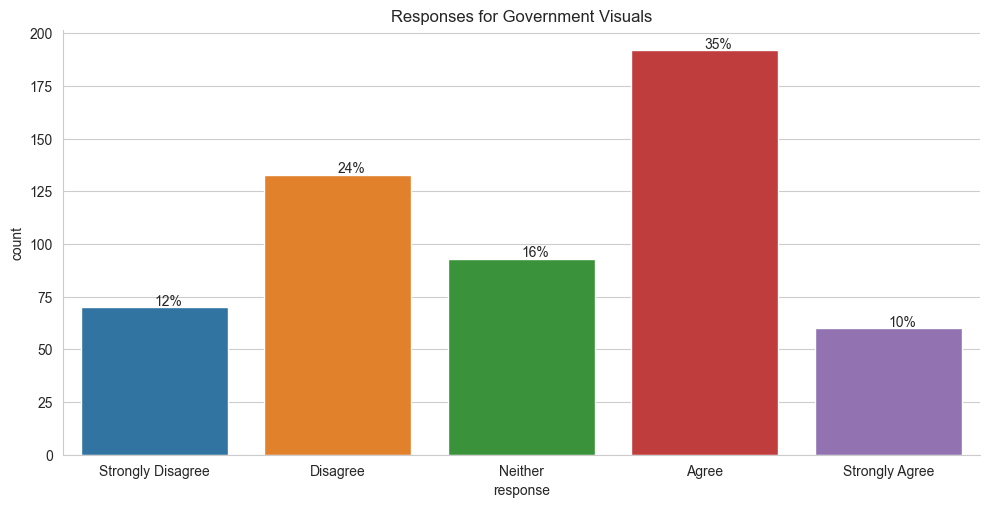

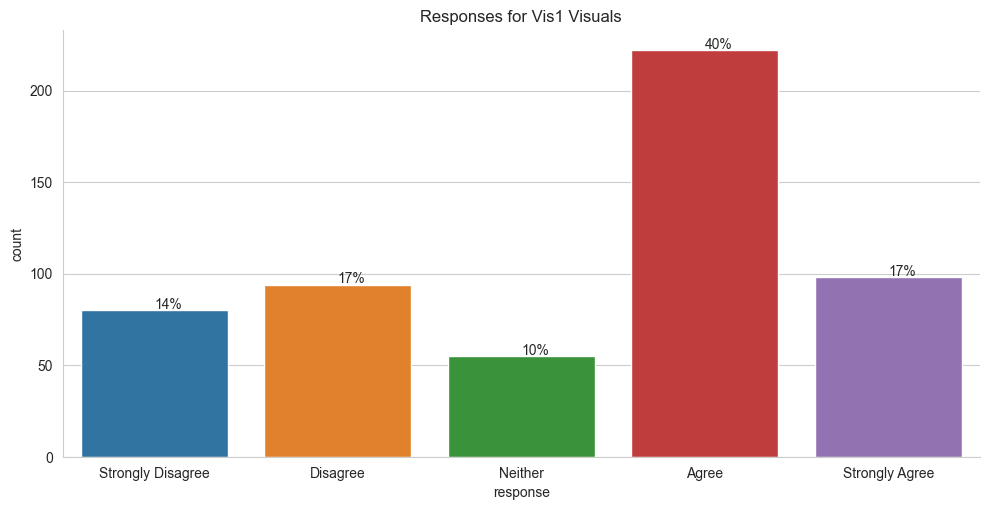

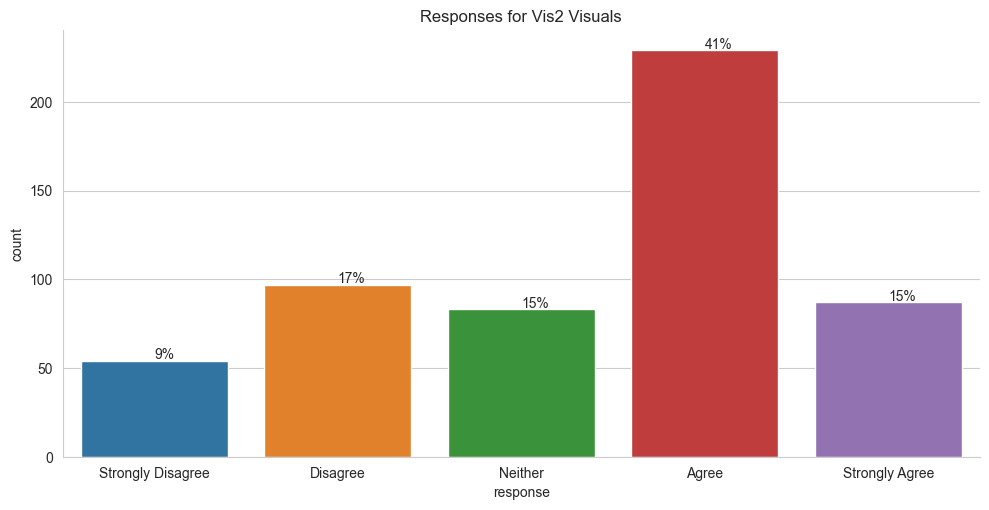

In [166]:
sns.set_style('whitegrid')

plot_response(concatenated, 'news')
plot_response(concatenated, 'vis3')
plot_response(concatenated, 'science')
plot_response(concatenated, 'government')
plot_response(concatenated, 'vis1')
plot_response(concatenated, 'vis2')

### Overall Responses for All Participants

In [167]:
gb_all = concatenated.groupby(['response']).count().reset_index()

In [168]:
gb_all

,response,name,id,image,folder
0,Agree,1218,1218,1218,1218
1,Disagree,679,679,679,679
2,Neither,424,424,424,424
3,Strongly Agree,459,459,459,459
4,Strongly Disagree,512,512,512,512


In [236]:
colorblind_colors = ['#2c7bb6', '#abd9e9', '#ffffbf','#fdae61', '#d7191c']
customPalette = sns.set_palette(sns.color_palette(colorblind_colors))

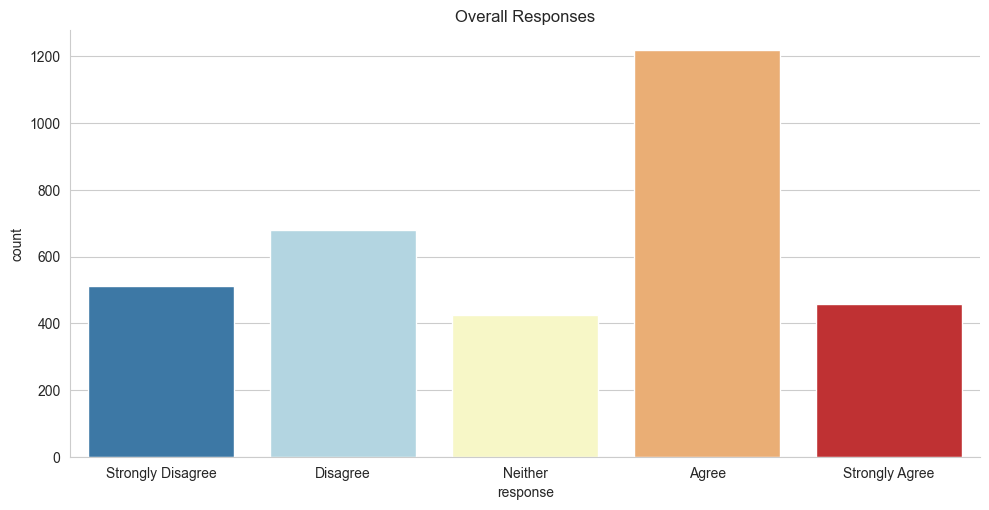

In [304]:
sns.catplot(data=concatenated,
            x='response',
            kind="count",
            height=5,
            aspect=2,
            order=RESPONSES,
            palette=customPalette)

plt.title(f"Overall Responses")
plt.savefig('overall.png', dpi=200, bbox_inches = 'tight')

### Stacked Bar Chart

In [170]:
gb_all_stacked = concatenated.groupby(['folder', 'name', 'response']).count().reset_index()

In [171]:
gb_all_stacked_news = gb_all_stacked.loc[gb_all_stacked['folder'] == 'news']
del gb_all_stacked_news['image']

In [172]:
gb_all_stacked_news

,folder,name,response,id
54,news,likert_1,Agree,26
55,news,likert_1,Disagree,4
56,news,likert_1,Neither,4
57,news,likert_1,Strongly Agree,15
58,news,likert_1,Strongly Disagree,1
59,news,likert_10,Agree,13
60,news,likert_10,Disagree,12
61,news,likert_10,Neither,10
62,news,likert_10,Strongly Agree,4
63,news,likert_10,Strongly Disagree,11


In [173]:
gb_all_stacked_news = pd.pivot_table(data=gb_all_stacked_news, index=['name'], columns=['response'], values='id')

In [174]:
gb_all_stacked_news

response,Agree,Disagree,Neither,Strongly Agree,Strongly Disagree
name,,,,,
likert_1,26.0,4.0,4.0,15.0,1.0
likert_10,13.0,12.0,10.0,4.0,11.0
likert_11,22.0,12.0,5.0,2.0,8.0
likert_2,18.0,11.0,8.0,9.0,4.0
likert_3,28.0,8.0,2.0,12.0,NaN
likert_4,23.0,10.0,5.0,12.0,NaN
likert_5,27.0,12.0,2.0,8.0,1.0
likert_6,16.0,12.0,6.0,6.0,10.0
likert_7,32.0,3.0,2.0,9.0,4.0


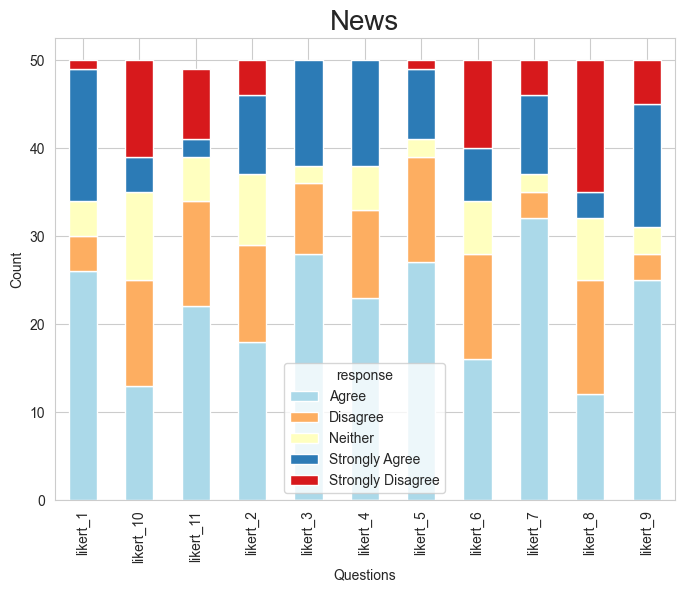

In [299]:
ax1 = gb_all_stacked_news.plot.bar(stacked=True, color=['#abd9e9', '#fdae61', '#ffffbf','#2c7bb6', '#d7191c'], figsize=(8,6))
plt.xlabel("Questions")
plt.ylabel("Count")
ax1.set_title('News', fontsize=20)
plt.savefig('news.png', dpi=200, bbox_inches = 'tight')

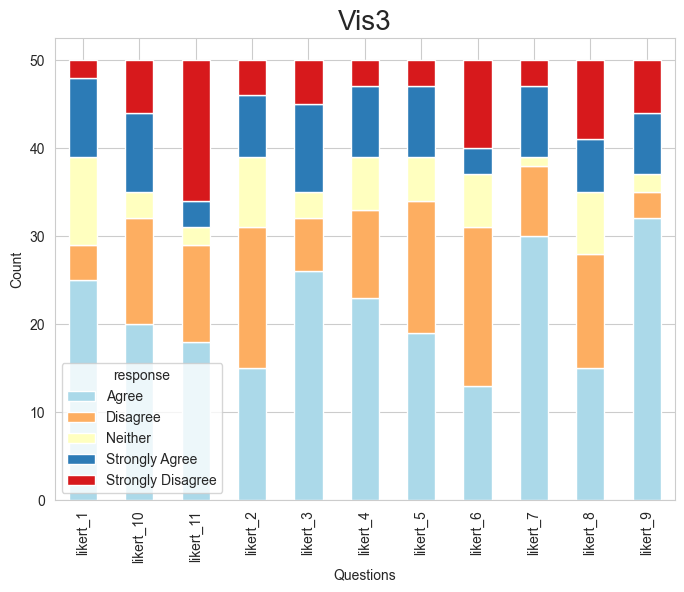

In [300]:
#'news' 'vis3' 'science' 'government' 'vis1' 'vis2'
gb_all_stacked_vis3 = gb_all_stacked.loc[gb_all_stacked['folder'] == 'vis3']
del gb_all_stacked_vis3['image']
gb_all_stacked_vis3 = pd.pivot_table(data=gb_all_stacked_vis3, index=['name'], columns=['response'], values='id')
ax2 = gb_all_stacked_vis3.plot.bar(stacked=True, color=['#abd9e9', '#fdae61', '#ffffbf','#2c7bb6', '#d7191c'], figsize=(8,6))
ax2.set_title('Vis3', fontsize=20)
plt.xlabel("Questions")
plt.ylabel("Count")
plt.savefig('vis3.png', dpi=200, bbox_inches = 'tight')

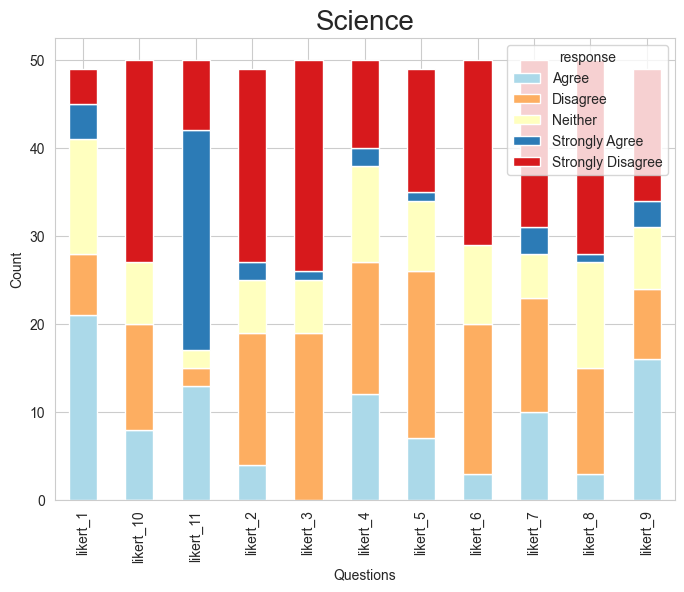

In [301]:
gb_all_stacked_science = gb_all_stacked.loc[gb_all_stacked['folder'] == 'science']
del gb_all_stacked_science['image']
gb_all_stacked_science = pd.pivot_table(data=gb_all_stacked_science, index=['name'], columns=['response'], values='id')
ax3 = gb_all_stacked_science.plot.bar(stacked=True, color=['#abd9e9', '#fdae61', '#ffffbf','#2c7bb6', '#d7191c'], figsize=(8,6))
ax3.set_title('Science', fontsize=20)
plt.xlabel("Questions")
plt.ylabel("Count")
plt.savefig('science.png', dpi=200, bbox_inches = 'tight')

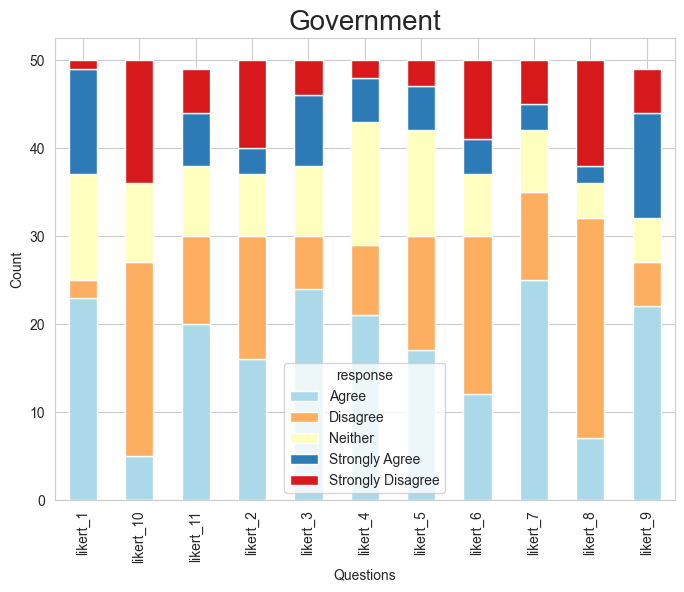

In [302]:
gb_all_stacked_government = gb_all_stacked.loc[gb_all_stacked['folder'] == 'government']
del gb_all_stacked_government['image']
gb_all_stacked_government = pd.pivot_table(data=gb_all_stacked_government, index=['name'], columns=['response'], values='id')
ax4 = gb_all_stacked_government.plot.bar(stacked=True, color=['#abd9e9', '#fdae61', '#ffffbf','#2c7bb6', '#d7191c'], figsize=(8,6))
ax4.set_title('Government', fontsize=20)
plt.xlabel("Questions")
plt.ylabel("Count")
plt.savefig('government.png', dpi=200, bbox_inches = 'tight')

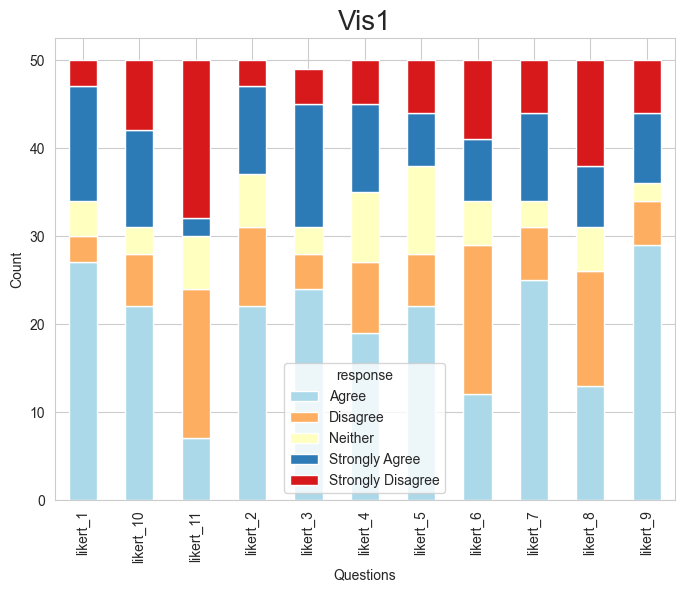

In [303]:
gb_all_stacked_vis1 = gb_all_stacked.loc[gb_all_stacked['folder'] == 'vis1']
del gb_all_stacked_vis1['image']
gb_all_stacked_vis1 = pd.pivot_table(data=gb_all_stacked_vis1, index=['name'], columns=['response'], values='id')
ax5 = gb_all_stacked_vis1.plot.bar(stacked=True, color=['#abd9e9', '#fdae61', '#ffffbf','#2c7bb6', '#d7191c'], figsize=(8,6))
ax5.set_title('Vis1', fontsize=20)
plt.xlabel("Questions")
plt.ylabel("Count")
plt.savefig('vis1.png', dpi=200, bbox_inches = 'tight')

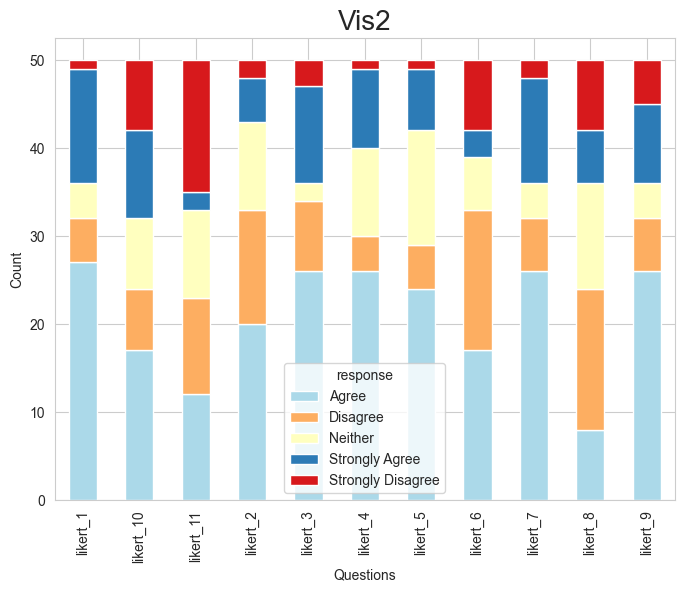

In [298]:
gb_all_stacked_vis2 = gb_all_stacked.loc[gb_all_stacked['folder'] == 'vis2']
del gb_all_stacked_vis2['image']
gb_all_stacked_vis2 = pd.pivot_table(data=gb_all_stacked_vis2, index=['name'], columns=['response'], values='id')
ax6 = gb_all_stacked_vis2.plot.bar(stacked=True, color=['#abd9e9', '#fdae61', '#ffffbf','#2c7bb6', '#d7191c'], figsize=(8,6))
ax6.set_title('Vis2', fontsize=20)
plt.xlabel("Questions")
plt.ylabel("Count")
plt.savefig('vis2.png', dpi=200, bbox_inches = 'tight')